<a href="https://colab.research.google.com/github/Ajay-Venky/FetchRewards_DataAnalyst/blob/main/Fetch_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Fetch Rewards Coding Exercise - Data Analyst - P Ajay Venkatesh

## Import libraries and read jsons as Dataframes

In [1]:
import pandas as pd
import json
import numpy as np
import re
from pandas import json_normalize

In [2]:
brands = pd.read_json('/content/drive/MyDrive/Fetch/brands.json', lines= True)
users = pd.read_json('/content/drive/MyDrive/Fetch/users.json', lines= True)
receipts = pd.read_json('/content/drive/MyDrive/Fetch/receipts.json', lines= True)

In [3]:
brands.head()

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827


In [4]:
users.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
3,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI


In [5]:
receipts.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


**Brand's pre-processing**

In [6]:
#convert cpg from nested dictionary into a dataframe
cpg = pd.DataFrame([x for x in brands['cpg']])
cpg.rename(columns={'$id':'cpg.id', '$ref':'cpg.ref'}, inplace=True)
# extract cpg.id from cpg's $oid
cpg['cpg.id'] = cpg['cpg.id'].apply(lambda x: x.get('$oid'))
#extract brand_id from brand's $oid
brands['_id'] = brands['_id'].apply(lambda x: x.get('$oid'))

In [7]:
#merg into a single dataframe and drop the original column
brands_clean = pd.merge(brands, cpg, left_index=True, right_index=True)
brands_clean.drop(columns='cpg', inplace=True)
brands_clean.head()

,_id,barcode,category,categoryCode,name,topBrand,brandCode,cpg.id,cpg.ref
0,601ac115be37ce2ead437551,511111019862,Baking,BAKING,test brand @1612366101024,0.0,NaN,601ac114be37ce2ead437550,Cogs
1,601c5460be37ce2ead43755f,511111519928,Beverages,BEVERAGES,Starbucks,0.0,STARBUCKS,5332f5fbe4b03c9a25efd0ba,Cogs
2,601ac142be37ce2ead43755d,511111819905,Baking,BAKING,test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176,601ac142be37ce2ead437559,Cogs
3,601ac142be37ce2ead43755a,511111519874,Baking,BAKING,test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051,601ac142be37ce2ead437559,Cogs
4,601ac142be37ce2ead43755e,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827,5332fa12e4b03c9a25efd1e7,Cogs


**User's Pre-Processing**

In [8]:
#extract user_id from brand's $oid
users['_id'] = users['_id'].apply(lambda x: x.get('$oid'))
#extract date from $date
users['createdDate'] = users['createdDate'].apply(lambda x: x.get('$date') if str(x) != str(np.nan) else x)
users['lastLogin'] = users['lastLogin'].apply(lambda x: x.get('$date') if str(x) != str(np.nan) else x)

In [9]:
#convert createdDate, lastLogin to datetime from milliseconds
users['createdDate'] = pd.to_datetime(users['createdDate']//1000, unit='s') # convert to datetime
users['lastLogin'] = pd.to_datetime(users['lastLogin']//1000, unit='s')

In [10]:
users.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,2021-01-03 15:25:30,2021-01-03 15:25:30,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI


**Receipt's Pre-Processing**

In [11]:
#extract receipt_id from brand's $oid
receipts['_id'] = receipts['_id'].apply(lambda x: x.get('$oid'))

In [12]:
# extract all the dates from Receipts using similar approach as above and loop
for i in receipts.columns:
    if re.findall(r'date|Date', i):
        receipts[i] = receipts[i].apply(lambda x: x.get('$date') if str(x) != str(np.nan) else x)
        receipts[i] = pd.to_datetime(receipts[i]//1000, unit='s')

In [13]:
receipts.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:36,2021-01-03 15:25:31,500.0,2021-01-03 00:00:00,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,2021-01-02 15:24:43,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 15:25:37,2021-01-03 15:25:37,NaT,2021-01-03 15:25:42,NaT,5.0,2021-01-03 00:00:00,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:39,2021-01-03 15:25:34,5.0,2021-01-03 00:00:00,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,2021-01-03 15:25:06,2021-01-03 15:25:06,2021-01-03 15:25:11,2021-01-03 15:25:11,2021-01-03 15:25:06,5.0,2021-01-02 15:25:06,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [14]:
#re-name all id columns for each dataframe to avoid errors and confusion
brands_clean.rename(columns={'_id':'brand_id'}, inplace=True)
users.rename(columns={'_id':'user_id'}, inplace=True)
receipts.rename(columns={'_id':'receipt_id'}, inplace=True)

##**Break Receipt's into rewards and items table**

In [15]:
with open('/content/drive/MyDrive/Fetch/receipts.json', 'r') as file:
    data = [json.loads(line) for line in file]

flattened_items = []

for item in data:
    receipt_id = item['_id']['$oid']
    #user_id = item['userId']
    if 'rewardsReceiptItemList' in item:
        items = item['rewardsReceiptItemList']

        # Iterate over the items in rewardsReceiptItemList
        for i in items:
            i['_id'] = receipt_id  # Add the _id column
            #i['user_id'] = user_id
            # Append the flattened item to the list
            flattened_items.append(i)

rewardsItemList = pd.DataFrame(flattened_items)

In [16]:
rewardsItemList.head()

,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,userFlaggedNewItem,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1.0,028400642255,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,False,1,True,NaN,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#rename _id to receipt_id to avoid errors
rewardsItemList = rewardsItemList.rename(columns = {'_id':'receipt_id'})

In [18]:
receipts_clean = pd.merge(receipts, rewardsItemList, on = 'receipt_id', how='inner')
receipts_clean.drop(columns='rewardsReceiptItemList', inplace=True)
receipts_clean.head()

,receipt_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned_x,purchaseDate,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned_y,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:36,2021-01-03 15:25:31,500.0,2021-01-03 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,2021-01-02 15:24:43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,2021-01-02 15:24:43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 15:25:37,2021-01-03 15:25:37,NaT,2021-01-03 15:25:42,NaT,5.0,2021-01-03 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:39,2021-01-03 15:25:34,5.0,2021-01-03 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##**Creating ER Tables**

In [19]:
user_table = users.copy()
user_table.head()

,user_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,2021-01-03 15:25:30,2021-01-03 15:25:30,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI


In [20]:
brand_table = brands_clean.copy()
brand_table.drop(['category'], axis = 1)

,brand_id,barcode,categoryCode,name,topBrand,brandCode,cpg.id,cpg.ref
0,601ac115be37ce2ead437551,511111019862,BAKING,test brand @1612366101024,0.0,NaN,601ac114be37ce2ead437550,Cogs
1,601c5460be37ce2ead43755f,511111519928,BEVERAGES,Starbucks,0.0,STARBUCKS,5332f5fbe4b03c9a25efd0ba,Cogs
2,601ac142be37ce2ead43755d,511111819905,BAKING,test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176,601ac142be37ce2ead437559,Cogs
3,601ac142be37ce2ead43755a,511111519874,BAKING,test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051,601ac142be37ce2ead437559,Cogs
4,601ac142be37ce2ead43755e,511111319917,CANDY_AND_SWEETS,test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827,5332fa12e4b03c9a25efd1e7,Cogs
...,...,...,...,...,...,...,...,...
1162,5f77274dbe37ce6b592e90c0,511111116752,BAKING,test brand @1601644365844,NaN,NaN,5f77274dbe37ce6b592e90bf,Cogs
1163,5dc1fca91dda2c0ad7da64ae,511111706328,NaN,Dippin Dots® Cereal,NaN,DIPPIN DOTS CEREAL,53e10d6368abd3c7065097cc,Cogs
1164,5f494c6e04db711dd8fe87e7,511111416173,CANDY_AND_SWEETS,test brand @1598639215217,NaN,TEST BRANDCODE @1598639215217,5332fa12e4b03c9a25efd1e7,Cogs
1165,5a021611e4b00efe02b02a57,511111400608,NaN,LIPTON TEA Leaves,0.0,LIPTON TEA Leaves,5332f5f6e4b03c9a25efd0b4,Cogs


In [21]:
category_table = brands_clean[['category', 'categoryCode']].copy()
category_table.head()

,category,categoryCode
0,Baking,BAKING
1,Beverages,BEVERAGES
2,Baking,BAKING
3,Baking,BAKING
4,Candy & Sweets,CANDY_AND_SWEETS


In [22]:
rewards_table = receipts.copy()
rewards_table = rewards_table.drop(['rewardsReceiptItemList'], axis = 1)

In [23]:
rewards_table.head()

,receipt_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:36,2021-01-03 15:25:31,500.0,2021-01-03 00:00:00,5.0,FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,2021-01-02 15:24:43,2.0,FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 15:25:37,2021-01-03 15:25:37,NaT,2021-01-03 15:25:42,NaT,5.0,2021-01-03 00:00:00,1.0,REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:39,2021-01-03 15:25:34,5.0,2021-01-03 00:00:00,4.0,FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,2021-01-03 15:25:06,2021-01-03 15:25:06,2021-01-03 15:25:11,2021-01-03 15:25:11,2021-01-03 15:25:06,5.0,2021-01-02 15:25:06,2.0,FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [24]:
items_table = rewardsItemList.copy()
items_table.rename(columns = {'_id':'receipt_id'}, inplace = True)
items_table.head()

,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,userFlaggedNewItem,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1.0,028400642255,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,False,1,True,NaN,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
transaction_table = receipts_clean[['userId', 'receipt_id', 'barcode', 'partnerItemId', 'purchaseDate', 'finalPrice']].copy()

In [26]:
transaction_table.head()

,userId,receipt_id,barcode,partnerItemId,purchaseDate,finalPrice
0,5ff1e1eacfcf6c399c274ae6,5ff1e1eb0a720f0523000575,4011,1,2021-01-03 00:00:00,26.00
1,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b,4011,1,2021-01-02 15:24:43,1
2,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b,028400642255,2,2021-01-02 15:24:43,10.00
3,5ff1e1f1cfcf6c399c274b0b,5ff1e1f10a720f052300057a,NaN,1,2021-01-03 00:00:00,NaN
4,5ff1e1eacfcf6c399c274ae6,5ff1e1ee0a7214ada100056f,4011,1,2021-01-03 00:00:00,28.00


##**1. Review Existing Unstructured Data and Diagram a New Structured Relational Data Model**

In [27]:
user_table.columns

Index(['user_id', 'active', 'createdDate', 'lastLogin', 'role', 'signUpSource',
       'state'],
      dtype='object')

In [28]:
brand_table.columns

Index(['brand_id', 'barcode', 'category', 'categoryCode', 'name', 'topBrand',
       'brandCode', 'cpg.id', 'cpg.ref'],
      dtype='object')

In [29]:
rewards_table.columns

Index(['receipt_id', 'bonusPointsEarned', 'bonusPointsEarnedReason',
       'createDate', 'dateScanned', 'finishedDate', 'modifyDate',
       'pointsAwardedDate', 'pointsEarned', 'purchaseDate',
       'purchasedItemCount', 'rewardsReceiptStatus', 'totalSpent', 'userId'],
      dtype='object')

In [30]:
items_table.columns

Index(['barcode', 'description', 'finalPrice', 'itemPrice', 'needsFetchReview',
       'partnerItemId', 'preventTargetGapPoints', 'quantityPurchased',
       'userFlaggedBarcode', 'userFlaggedNewItem', 'userFlaggedPrice',
       'userFlaggedQuantity', 'receipt_id', 'needsFetchReviewReason',
       'pointsNotAwardedReason', 'pointsPayerId', 'rewardsGroup',
       'rewardsProductPartnerId', 'userFlaggedDescription',
       'originalMetaBriteBarcode', 'originalMetaBriteDescription', 'brandCode',
       'competitorRewardsGroup', 'discountedItemPrice',
       'originalReceiptItemText', 'itemNumber',
       'originalMetaBriteQuantityPurchased', 'pointsEarned', 'targetPrice',
       'competitiveProduct', 'originalFinalPrice',
       'originalMetaBriteItemPrice', 'deleted', 'priceAfterCoupon',
       'metabriteCampaignId'],
      dtype='object')

In [31]:
category_table.columns

Index(['category', 'categoryCode'], dtype='object')

In [32]:
transaction_table.columns

Index(['userId', 'receipt_id', 'barcode', 'partnerItemId', 'purchaseDate',
       'finalPrice'],
      dtype='object')

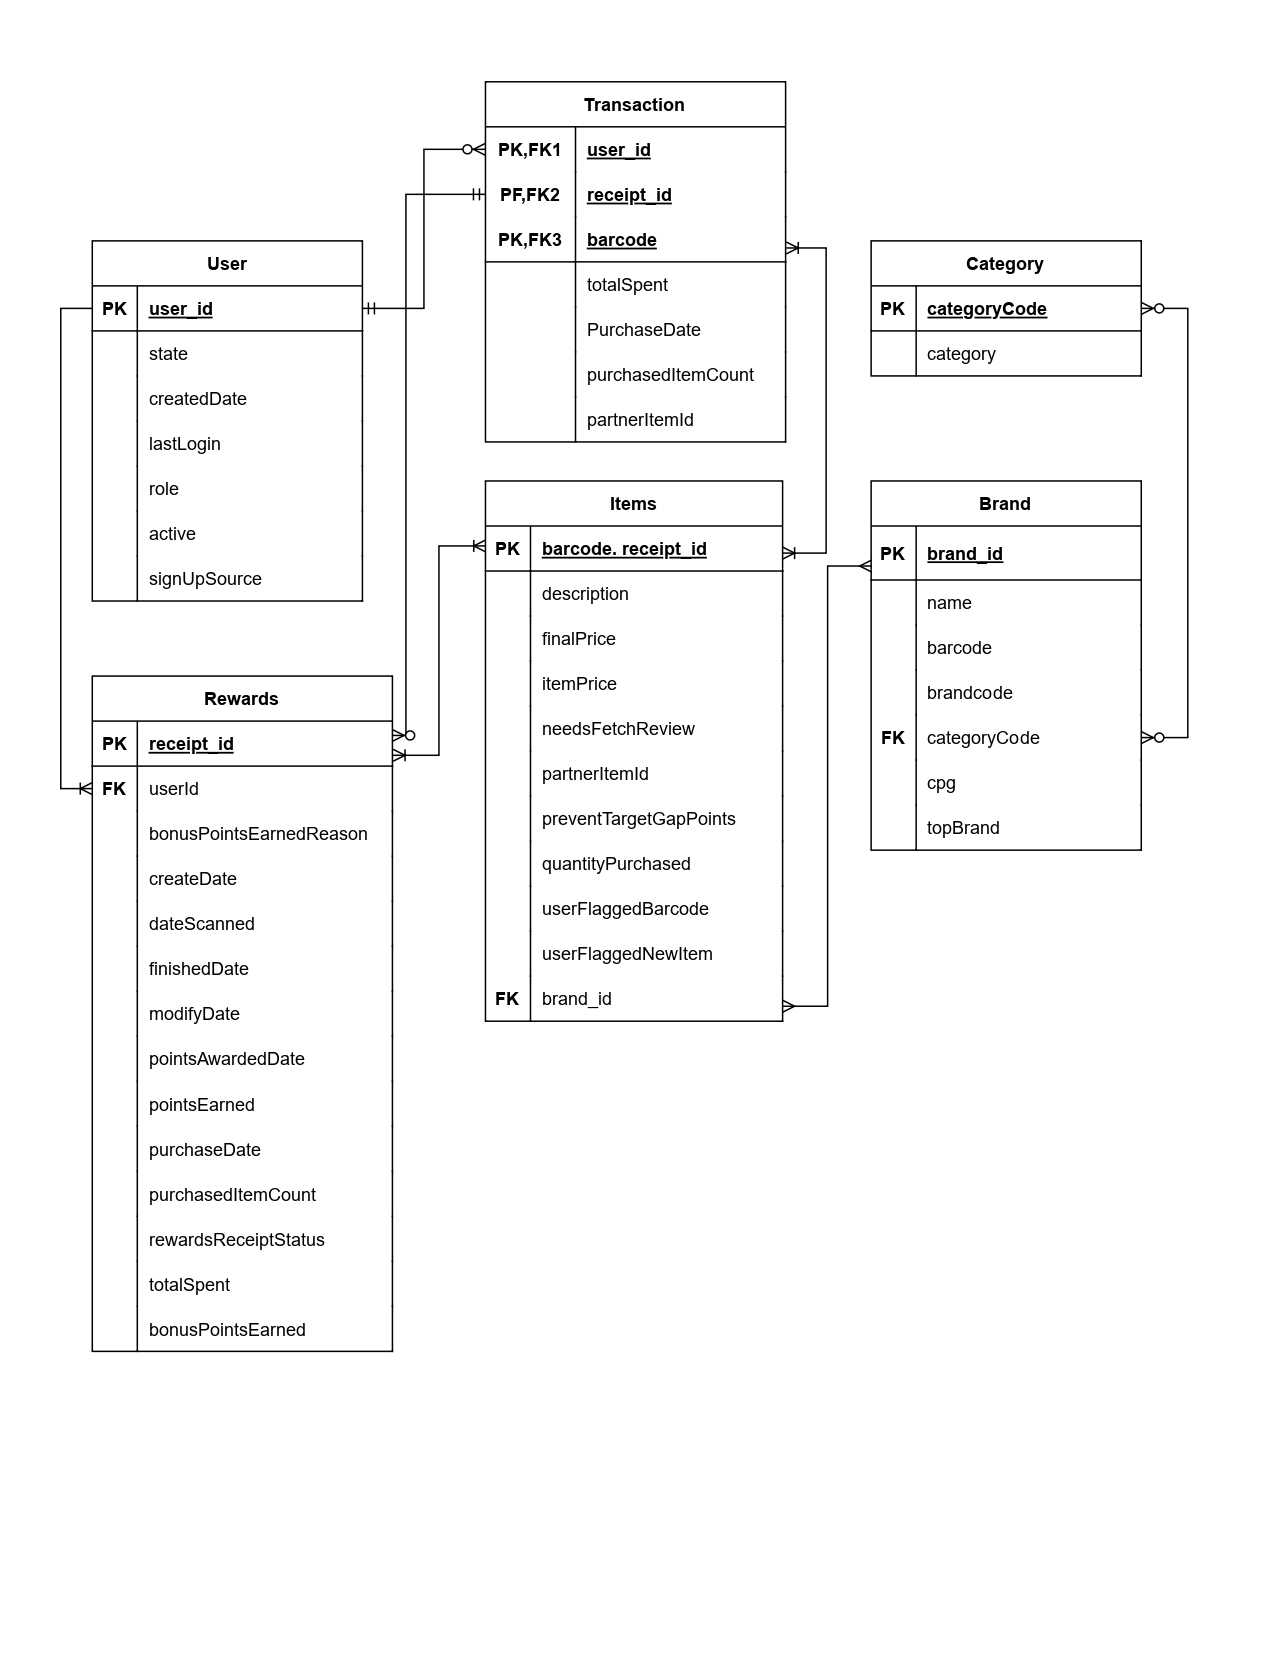

##**2. Write a query that directly answers a predetermined question from a business stakeholder**

In [33]:
import sqlite3

# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Load the DataFrame into the database as a table
items_table.to_sql('items_table', conn, index=False)
user_table.to_sql('user_table', conn, index=False)
rewards_table.to_sql('rewards_table', conn, index=False)
category_table.to_sql('category_table', conn, index=False)
brand_table.to_sql('brand_table', conn, index=False)
receipts_clean.to_sql('rewards_test', conn, index=False)



6941

**1. What are the top 5 brands by receipts scanned for most recent month?**

In [34]:
query = """
SELECT b.name, COUNT(r.receipt_id) AS receipts_scanned
FROM brand_table b
JOIN items_table i ON b.barcode = i.barcode
JOIN rewards_table r ON i.receipt_id = r.receipt_id
WHERE r.dateScanned >= '2021-01-01 00:00:00'
GROUP BY b.name
ORDER BY receipts_scanned DESC
LIMIT 5;
"""
result = pd.read_sql_query(query, conn)

In [35]:
result

,name,receipts_scanned
0,Tostitos,23
1,Swanson,11
2,Cracker Barrel Cheese,10
3,Prego,7
4,Diet Chris Cola,7


**3. When considering average spend from receipts with 'rewardsReceiptStatus’ of FINISHED or REJECTED, which is greater?**

In [36]:
query3_1 = """Select AVG(totalSpent)
From rewards_table
Where rewardsReceiptStatus = "FINISHED";
"""
result3_1 = pd.read_sql_query(query3_1, conn)

In [37]:
query3_2 = """Select AVG(totalSpent)
From rewards_table
Where rewardsReceiptStatus = "REJECTED";
"""
result3_2 = pd.read_sql_query(query3_2, conn)

In [38]:
result3_1

,AVG(totalSpent)
0,80.854305


In [39]:
result3_2

,AVG(totalSpent)
0,23.326056


**4. When considering total number of items purchased from receipts with 'rewardsReceiptStatus’ of FINISHED or REJECTED, which is greater?**

In [40]:
query4_1 = """SELECT SUM(purchasedItemCount)
From rewards_table
Where rewardsReceiptStatus = "FINISHED";
"""
result4_1 = pd.read_sql_query(query4_1, conn)

In [41]:
query4_2 = """SELECT SUM(purchasedItemCount)
From rewards_table
Where rewardsReceiptStatus = "REJECTED";
"""
result4_2 = pd.read_sql_query(query4_2, conn)

In [42]:
result4_1

,SUM(purchasedItemCount)
0,8184.0


In [43]:
result4_2

,SUM(purchasedItemCount)
0,173.0


**5. Which brand has the most spend among users who were created within the past 6 months?**

In [44]:
query5 = """SELECT b.name, SUM(r.totalSpent) AS total_spend, u.createdDate
FROM brand_table b
JOIN items_table i ON b.barcode = i.barcode
JOIN rewards_table r ON i.receipt_id = r.receipt_id
JOIN user_table u ON r.userId = u.user_id
WHERE u.createdDate >= '2020-08-01 00:00:00'
GROUP BY b.name
ORDER BY total_spend DESC
LIMIT 1; """

result5 = pd.read_sql_query(query5, conn)

In [45]:
result5

,name,total_spend,createdDate
0,Tostitos,23812.97,2021-01-16 23:13:45


**6. Which brand has the most transactions among users who were created within the past 6 months?**

In [46]:
query6 = """SELECT b.name, COUNT(*) AS transaction_count, u.createdDate
FROM brand_table b
JOIN items_table i ON b.barcode = i.barcode
JOIN rewards_table r ON i.receipt_id = r.receipt_id
JOIN user_table u ON r.userId = u.user_id
WHERE u.createdDate >= '2020-08-01 00:00:00'
GROUP BY b.name
ORDER BY transaction_count DESC
LIMIT 1;"""

result6 = pd.read_sql_query(query6, conn)

In [47]:
result6

,name,transaction_count,createdDate
0,Tostitos,43,2021-01-16 23:13:45


## **3. Evaluate Data Quality Issues in the Data Provided**

**Exploratory Data Analysis**

##**User Table**

In [48]:
user_table.head()

,user_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,2021-01-03 15:25:30,2021-01-03 15:25:30,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI


In [49]:
user_table.dtypes

user_id                 object
active                    bool
createdDate     datetime64[ns]
lastLogin       datetime64[ns]
role                    object
signUpSource            object
state                   object
dtype: object

In [50]:
user_table.isna().sum()

user_id          0
active           0
createdDate      0
lastLogin       62
role             0
signUpSource    48
state           56
dtype: int64

In [51]:
user_table.user_id.nunique()

212

In [52]:
user_table.groupby(['user_id','createdDate','lastLogin'],as_index=False)['role'].count().rename(
    columns={'role':'counts'}).sort_values(ascending=False, by = 'counts')

,user_id,createdDate,lastLogin,counts
0,54943462e4b07e684157a532,2014-12-19 14:21:22,2021-03-05 16:52:23,20
9,5fc961c3b8cfca11a077dd33,2020-12-03 22:08:03,2021-02-26 22:39:16,20
7,5fa41775898c7a11a6bcef3e,2020-11-05 15:17:09,2021-03-04 16:02:02,18
32,5ff5d15aeb7c7d12096d91a2,2021-01-06 15:03:54,2021-01-06 15:08:10,18
3,59c124bae4b0299e55b0f330,2017-09-19 14:07:54,2021-02-08 16:42:58,18
...,...,...,...,...
64,5ffca30604929111f6e92525,2021-01-11 19:12:06,2021-01-11 19:12:06,1
63,5ffc9d9f04929111f6e92456,2021-01-11 18:49:03,2021-01-11 18:49:03,1
61,5ffc9001b3348b11c93388b6,2021-01-11 17:50:57,2021-01-11 17:50:57,1
58,5ff8da7eb3348b11c9337b72,2021-01-08 22:19:42,2021-01-08 22:19:42,1


 Lot of duplicates values for logins are identified, because of this we're not able to calculate if a user is logging in more, are they spending more or getting more rewards.
Hence RFME analysis can not be perfomed as it will be baised

In [53]:
user_tableDups = user_table[user_table.duplicated()]

In [54]:
user_tableDups

,user_id,active,createdDate,lastLogin,role,signUpSource,state
1,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
5,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
8,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
...,...,...,...,...,...,...,...
490,54943462e4b07e684157a532,True,2014-12-19 14:21:22,2021-03-05 16:52:23,fetch-staff,NaN,NaN
491,54943462e4b07e684157a532,True,2014-12-19 14:21:22,2021-03-05 16:52:23,fetch-staff,NaN,NaN
492,54943462e4b07e684157a532,True,2014-12-19 14:21:22,2021-03-05 16:52:23,fetch-staff,NaN,NaN
493,54943462e4b07e684157a532,True,2014-12-19 14:21:22,2021-03-05 16:52:23,fetch-staff,NaN,NaN


In [55]:
user_table.user_id.value_counts()

54943462e4b07e684157a532    20
5fc961c3b8cfca11a077dd33    20
5ff5d15aeb7c7d12096d91a2    18
5fa41775898c7a11a6bcef3e    18
59c124bae4b0299e55b0f330    18
                            ..
6004a965e257124ec6b9a39f     1
600746fd6e64691717e8cfb5     1
60074b996e64691717e8f11a     1
60074246325c8a12289e22a0     1
60088e5d633aab121bb8e5cf     1
Name: user_id, Length: 212, dtype: int64

In [56]:
users = user_table.drop_duplicates(keep='first')

In [57]:
users.isna().sum()

user_id          0
active           0
createdDate      0
lastLogin       40
role             0
signUpSource     5
state            6
dtype: int64

In [58]:
users.head()

,user_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,2021-01-03 15:25:30,2021-01-03 15:25:30,consumer,Email,WI
6,5ff1e1e8cfcf6c399c274ad9,True,2021-01-03 15:25:28,2021-01-03 15:25:28,consumer,Email,WI
7,5ff1e1b7cfcf6c399c274a5a,True,2021-01-03 15:24:39,2021-01-03 15:24:39,consumer,Email,WI
9,5ff1e1f1cfcf6c399c274b0b,True,2021-01-03 15:25:37,2021-01-03 15:25:37,consumer,Email,WI


In [59]:
users.active.value_counts()

True     211
False      1
Name: active, dtype: int64

In [60]:
users.state.value_counts()

WI    193
AL      5
IL      3
KY      1
CO      1
OH      1
SC      1
NH      1
Name: state, dtype: int64

In [61]:
users.signUpSource.value_counts()

Email     204
Google      3
Name: signUpSource, dtype: int64

In [62]:
users['year'] = users['createdDate'].dt.year
users['month'] = users['createdDate'].dt.month
users['day'] = users['createdDate'].dt.day

<ipython-input-62-a3744d0ea9ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['year'] = users['createdDate'].dt.year
<ipython-input-62-a3744d0ea9ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['month'] = users['createdDate'].dt.month
<ipython-input-62-a3744d0ea9ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [63]:
grouped_data = users.groupby(['year', 'month'])['user_id'].count()

In [64]:
grouped_data

year  month
2014  12         1
2015  4          1
2017  7          1
      9          1
      12         1
2020  1          1
      7          1
      11         4
      12         1
2021  1        170
      2         30
Name: user_id, dtype: int64

Filtering only consumer data

In [65]:
consumer = user_table[user_table['role'] == 'consumer']

In [66]:
consumer.user_id.value_counts()

5ff5d15aeb7c7d12096d91a2    18
600fb1ac73c60b12049027bb    16
5ff1e194b6a9d73a3a9f1052    11
600987d77d983a11f63cfa92     9
5a43c08fe4b014fd6b6a0612     8
                            ..
5ff36d83135e7011bcb864d6     1
600746fd6e64691717e8cfb5     1
60074b996e64691717e8f11a     1
60074246325c8a12289e22a0     1
60268c69efa6011bb151075f     1
Name: user_id, Length: 204, dtype: int64

Checking number of duplicates

In [67]:
consumer[consumer['user_id'] == '5ff5d15aeb7c7d12096d91a2']

,user_id,active,createdDate,lastLogin,role,signUpSource,state
60,5ff5d15aeb7c7d12096d91a2,True,2021-01-06 15:03:54,2021-01-06 15:08:10,consumer,Email,WI
61,5ff5d15aeb7c7d12096d91a2,True,2021-01-06 15:03:54,2021-01-06 15:08:10,consumer,Email,WI
62,5ff5d15aeb7c7d12096d91a2,True,2021-01-06 15:03:54,2021-01-06 15:08:10,consumer,Email,WI
63,5ff5d15aeb7c7d12096d91a2,True,2021-01-06 15:03:54,2021-01-06 15:08:10,consumer,Email,WI
64,5ff5d15aeb7c7d12096d91a2,True,2021-01-06 15:03:54,2021-01-06 15:08:10,consumer,Email,WI
65,5ff5d15aeb7c7d12096d91a2,True,2021-01-06 15:03:54,2021-01-06 15:08:10,consumer,Email,WI
67,5ff5d15aeb7c7d12096d91a2,True,2021-01-06 15:03:54,2021-01-06 15:08:10,consumer,Email,WI
68,5ff5d15aeb7c7d12096d91a2,True,2021-01-06 15:03:54,2021-01-06 15:08:10,consumer,Email,WI
69,5ff5d15aeb7c7d12096d91a2,True,2021-01-06 15:03:54,2021-01-06 15:08:10,consumer,Email,WI
70,5ff5d15aeb7c7d12096d91a2,True,2021-01-06 15:03:54,2021-01-06 15:08:10,consumer,Email,WI


##**Rewards Table**

In [68]:
rewards_table.head()

,receipt_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:36,2021-01-03 15:25:31,500.0,2021-01-03 00:00:00,5.0,FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,2021-01-02 15:24:43,2.0,FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 15:25:37,2021-01-03 15:25:37,NaT,2021-01-03 15:25:42,NaT,5.0,2021-01-03 00:00:00,1.0,REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:39,2021-01-03 15:25:34,5.0,2021-01-03 00:00:00,4.0,FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,2021-01-03 15:25:06,2021-01-03 15:25:06,2021-01-03 15:25:11,2021-01-03 15:25:11,2021-01-03 15:25:06,5.0,2021-01-02 15:25:06,2.0,FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [69]:
rewards_table.dtypes

receipt_id                         object
bonusPointsEarned                 float64
bonusPointsEarnedReason            object
createDate                 datetime64[ns]
dateScanned                datetime64[ns]
finishedDate               datetime64[ns]
modifyDate                 datetime64[ns]
pointsAwardedDate          datetime64[ns]
pointsEarned                      float64
purchaseDate               datetime64[ns]
purchasedItemCount                float64
rewardsReceiptStatus               object
totalSpent                        float64
userId                             object
dtype: object

In [70]:
rewards_table.isna().sum()

receipt_id                   0
bonusPointsEarned          575
bonusPointsEarnedReason    575
createDate                   0
dateScanned                  0
finishedDate               551
modifyDate                   0
pointsAwardedDate          582
pointsEarned               510
purchaseDate               448
purchasedItemCount         484
rewardsReceiptStatus         0
totalSpent                 435
userId                       0
dtype: int64

In [71]:
rewards_table.receipt_id.nunique()

1119

len(rewards_table)

In [72]:
x = rewards_table["bonusPointsEarned"] - rewards_table["pointsEarned"]

In [73]:
x

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1114    0.0
1115    NaN
1116    NaN
1117    0.0
1118    NaN
Length: 1119, dtype: float64

Bonus points earned and points earned are the same.

**Checking if there is a co-relation between total spent and bonus points earned**

In [74]:
xx = rewards_table[rewards_table['totalSpent'] < 1500 ]

<Axes: xlabel='purchasedItemCount'>

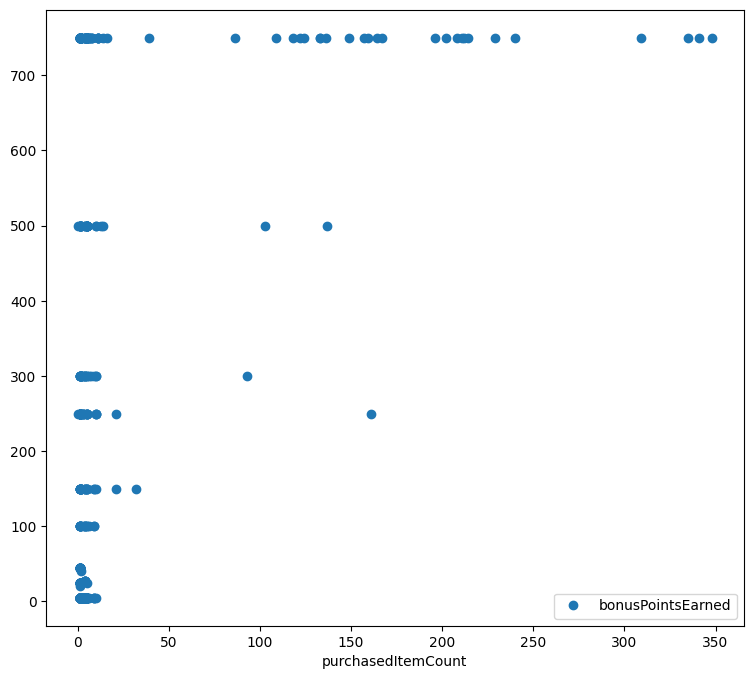

In [75]:
xx.plot(x= 'purchasedItemCount', y="bonusPointsEarned", style="o", figsize=(9, 8))

In [76]:
category_table.head()

,category,categoryCode
0,Baking,BAKING
1,Beverages,BEVERAGES
2,Baking,BAKING
3,Baking,BAKING
4,Candy & Sweets,CANDY_AND_SWEETS


In [77]:
category_table.category.value_counts()

Baking                         369
Beer Wine Spirits               90
Snacks                          75
Candy & Sweets                  71
Beverages                       63
Magazines                       44
Health & Wellness               44
Breakfast & Cereal              40
Grocery                         39
Dairy                           33
Condiments & Sauces             27
Frozen                          24
Personal Care                   20
Baby                            18
Canned Goods & Soups            12
Beauty                           9
Cleaning & Home Improvement      6
Deli                             6
Beauty & Personal Care           6
Household                        5
Bread & Bakery                   5
Dairy & Refrigerated             5
Outdoor                          1
Name: category, dtype: int64

In [78]:
category_table.categoryCode.value_counts()

BAKING                           359
CANDY_AND_SWEETS                  71
BEER_WINE_SPIRITS                 31
HEALTHY_AND_WELLNESS              14
GROCERY                           11
BABY                               7
CLEANING_AND_HOME_IMPROVEMENT      6
BREAD_AND_BAKERY                   5
DAIRY_AND_REFRIGERATED             5
PERSONAL_CARE                      4
BEVERAGES                          1
OUTDOOR                            1
MAGAZINES                          1
FROZEN                             1
Name: categoryCode, dtype: int64

In [79]:
category_table.isna().sum()

category        155
categoryCode    650
dtype: int64

##**Items Table**

In [80]:
items_table.head()

,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,userFlaggedNewItem,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1.0,028400642255,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,False,1,True,NaN,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
items_table.isna().sum()

barcode                               3851
description                            381
finalPrice                             174
itemPrice                              174
needsFetchReview                      6128
partnerItemId                            0
preventTargetGapPoints                6583
quantityPurchased                      174
userFlaggedBarcode                    6604
userFlaggedNewItem                    6618
userFlaggedPrice                      6642
userFlaggedQuantity                   6642
receipt_id                               0
needsFetchReviewReason                6722
pointsNotAwardedReason                6601
pointsPayerId                         5674
rewardsGroup                          5210
rewardsProductPartnerId               4672
userFlaggedDescription                6736
originalMetaBriteBarcode              6870
originalMetaBriteDescription          6931
brandCode                             4341
competitorRewardsGroup                6666
discountedI

In [82]:
items_table1 = items_table.copy()

**Analyzing relation between Final price and points earned**

In [83]:
items_table1 = items_table1[items_table['brandCode'].notna()]

In [84]:
items_table1.head()

,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,userFlaggedNewItem,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
8,NaN,MSSN TORTLLA,2.23,2.23,NaN,1009,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,046000832517,"Old El Paso Mild Chopped Green Chiles, 4.5 Oz",10.00,10.00,NaN,0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,044000000745,-Cheddar,1.00,1.00,NaN,1030,NaN,1.0,NaN,NaN,...,044000000745,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
306,012000809941,REGULAR PEPSI SODA COLA CAN 12 CT 144 OZ,1.96,1.96,NaN,1016,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PEPSI 12 OZ 12 PACK
308,028400642033,DORITOS TORTILLA CHIP NACHO CHEESE BAG 7.625 OZ,6.90,6.90,NaN,1022,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DORITOS NACHO CHEESE MULTI SERVE


In [85]:
items_table1['pointsEarned'] = items_table1['pointsEarned'].astype(float)
items_table1['finalPrice'] = items_table1['finalPrice'].astype(float)

In [86]:
items_table1.groupby("brandCode").pointsEarned.sum().sort_values(ascending = False).head()

brandCode
BEN AND JERRYS    20548.6
KNORR              6993.5
KLEENEX            4440.3
CRACKER BARREL     2814.0
HUGGIES            1199.4
Name: pointsEarned, dtype: float64

In [87]:
items_table1.groupby("brandCode").finalPrice.sum().sort_values(ascending = False).head(5)

brandCode
BEN AND JERRYS    2149.45
HEMPLER'S         1102.30
CRACKER BARREL    1069.32
KNORR              706.11
HY-VEE             656.62
Name: finalPrice, dtype: float64

In [88]:
items_table1.to_csv('items.csv')

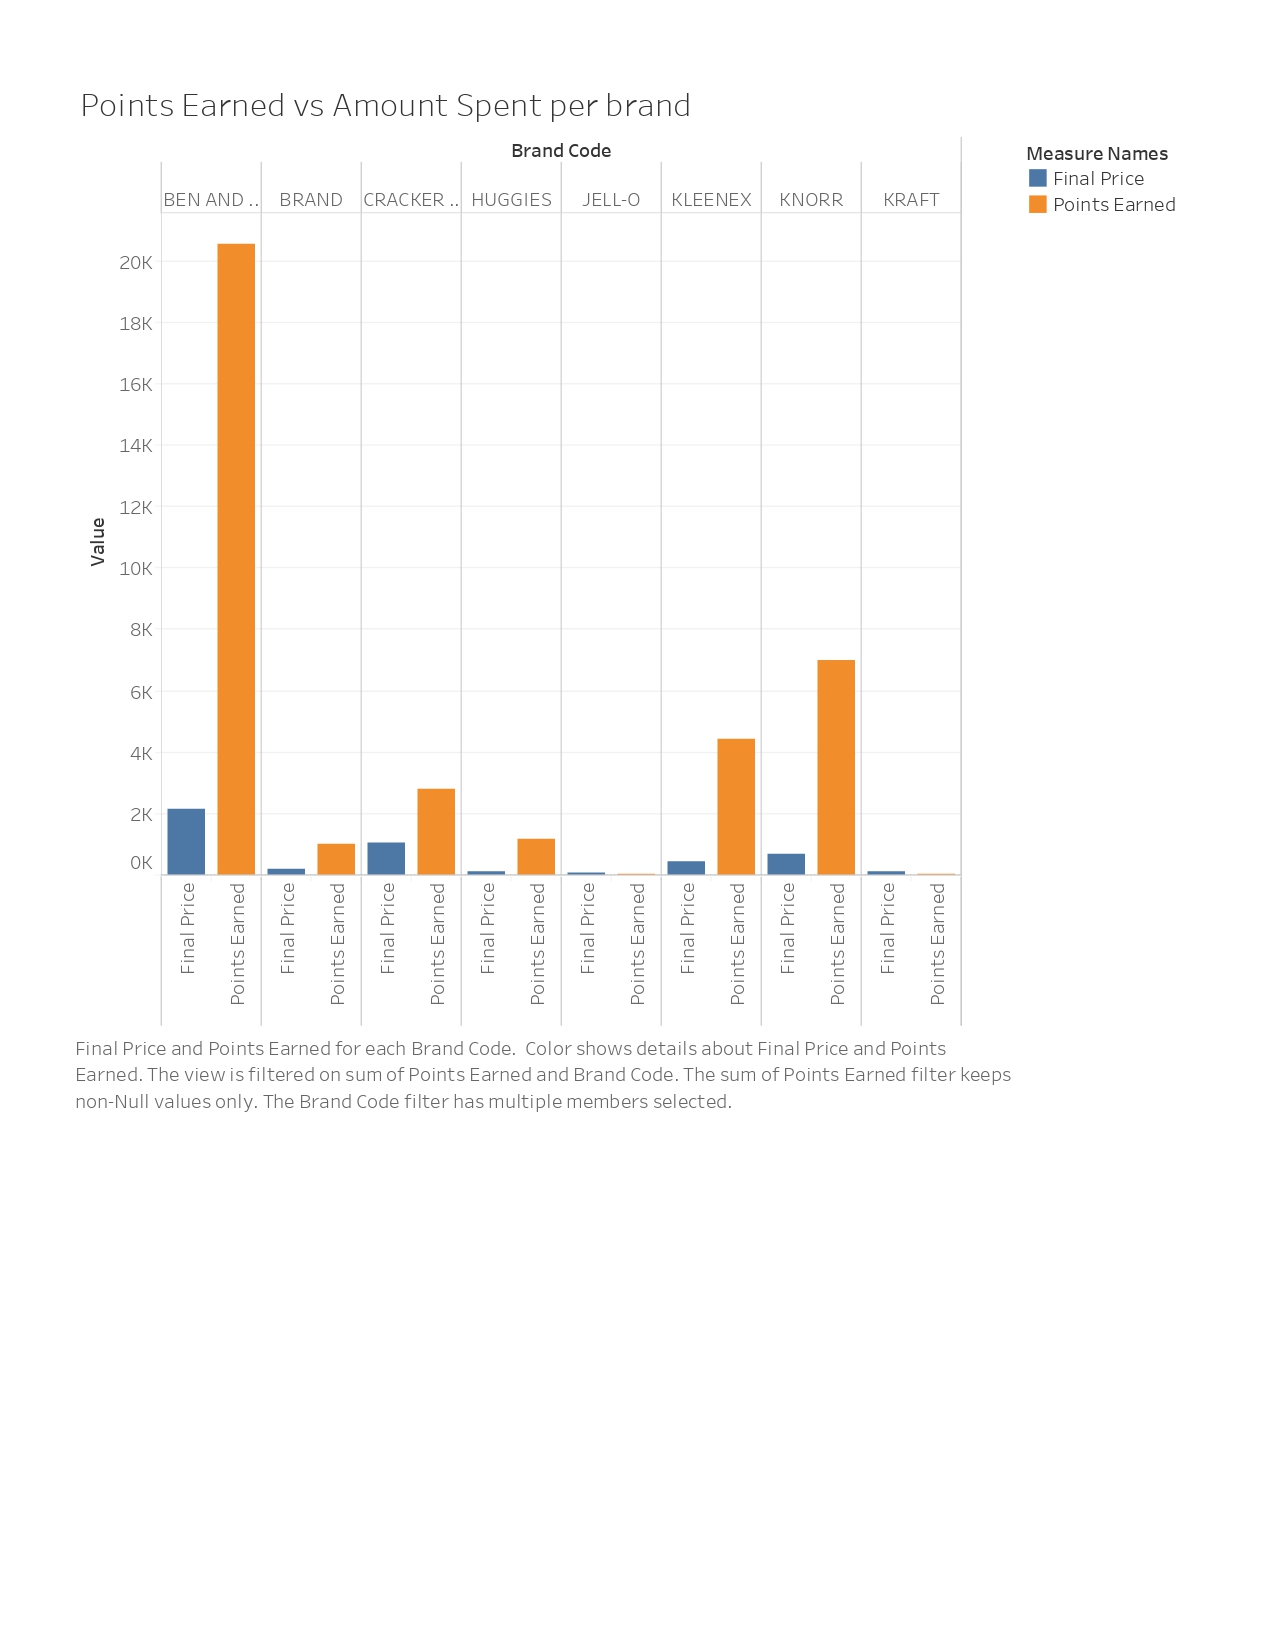

## **Brands Table**

In [89]:
brand_table.head()

,brand_id,barcode,category,categoryCode,name,topBrand,brandCode,cpg.id,cpg.ref
0,601ac115be37ce2ead437551,511111019862,Baking,BAKING,test brand @1612366101024,0.0,NaN,601ac114be37ce2ead437550,Cogs
1,601c5460be37ce2ead43755f,511111519928,Beverages,BEVERAGES,Starbucks,0.0,STARBUCKS,5332f5fbe4b03c9a25efd0ba,Cogs
2,601ac142be37ce2ead43755d,511111819905,Baking,BAKING,test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176,601ac142be37ce2ead437559,Cogs
3,601ac142be37ce2ead43755a,511111519874,Baking,BAKING,test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051,601ac142be37ce2ead437559,Cogs
4,601ac142be37ce2ead43755e,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827,5332fa12e4b03c9a25efd1e7,Cogs


In [90]:
brand_table.dtypes

brand_id         object
barcode           int64
category         object
categoryCode     object
name             object
topBrand        float64
brandCode        object
cpg.id           object
cpg.ref          object
dtype: object

In [91]:
brand_table.isna().sum()

brand_id          0
barcode           0
category        155
categoryCode    650
name              0
topBrand        612
brandCode       234
cpg.id            0
cpg.ref           0
dtype: int64

In [92]:
brand_table.brandCode.value_counts()

                                 35
GOODNITES                         2
HUGGIES                           2
ROYAL DANSK                       1
SOL                               1
                                 ..
TEST BRANDCODE @1599159969028     1
TEST BRANDCODE @1597350074404     1
SEDAL                             1
RED ROCK DELI                     1
TEST BRANDCODE @1613158231644     1
Name: brandCode, Length: 897, dtype: int64

In [93]:
brand_table.groupby(['categoryCode', 'brandCode'])['barcode'].count()

categoryCode   brandCode        
BABY           A+D                  1
               GERBER BABY FOOD     1
               GERBER GOOD START    1
               GOODNITES            1
               HUGGIES              1
                                   ..
OUTDOOR        KINGSFORD            1
PERSONAL_CARE  DEGREE               1
               DEPEND               1
               TRESEMME             1
               VASELINE             1
Name: barcode, Length: 444, dtype: int64